**News Article Website Scrapping**

In [92]:
# Web scraping imports
import requests
from bs4 import BeautifulSoup

# Scrapes news article data from malaysiakini.com
def url_to_transcript(url):
    '''Returns news article specifically from malaysiakini.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="content-drop").find_all('p')]
    print(url)
    return text


In [93]:
text = url_to_transcript('https://www.malaysiakini.com/news/469343')

https://www.malaysiakini.com/news/469343


**Combine Scrapped Text**

In [94]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text


In [99]:
combined_text = combine_text(text)

'Kegagalan kerajaan Pakatan Harapan (PH) untuk berinteraksi dengan orang awam menyebabkan ia tidak dapat menyekat bantahan terhadap rancangan meratifikasi Konvensyen Antarabangsa mengenai Penghapusan Segala Bentuk Diskriminasi Kaum (Icerd), kata Khairy Jamaluddin. Dalam wawancara bersama R.AGE, bekas menteri belia dan sukan itu berkata beliau percaya kerajaan dapat meneruskan rancangan itu jika melakukan perbincangan dan interaksi (engagement) yang cukup dengan orang ramai. "Ia boleh dilakukan, tetapi ia perlu melalui penerangan berterusan (syndication) yang banyak dengan orang awam. "Kita perlu faham bagaimana pengecualian dan penilaian dibuat, sama ada ia terikat dengan masa...," katanya seperti dipetik sisipan akhbar The Star itu, hari ini. "Ini adalah persoalan kompleks dan melainkan anda ada pemahaman yang baik atau penerangan yang luas tentang Icerd, ia akan dilihat melalui perspektif negatif sebagai sesuatu yang sama sekali tidak diterima orang ramai orang Melayu dan Islam," kat

**Cleaning Combined Text**

In [118]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned_data = clean_text(combined_text)

**Splitting Text into Bag of Words**

In [120]:
data = cleaned_data.split()
data

['kegagalan',
 'kerajaan',
 'pakatan',
 'harapan',
 'ph',
 'untuk',
 'berinteraksi',
 'dengan',
 'orang',
 'awam',
 'menyebabkan',
 'ia',
 'tidak',
 'dapat',
 'menyekat',
 'bantahan',
 'terhadap',
 'rancangan',
 'meratifikasi',
 'konvensyen',
 'antarabangsa',
 'mengenai',
 'penghapusan',
 'segala',
 'bentuk',
 'diskriminasi',
 'kaum',
 'icerd',
 'kata',
 'khairy',
 'jamaluddin',
 'dalam',
 'wawancara',
 'bersama',
 'rage',
 'bekas',
 'menteri',
 'belia',
 'dan',
 'sukan',
 'itu',
 'berkata',
 'beliau',
 'percaya',
 'kerajaan',
 'dapat',
 'meneruskan',
 'rancangan',
 'itu',
 'jika',
 'melakukan',
 'perbincangan',
 'dan',
 'interaksi',
 'engagement',
 'yang',
 'cukup',
 'dengan',
 'orang',
 'ramai',
 'ia',
 'boleh',
 'dilakukan',
 'tetapi',
 'ia',
 'perlu',
 'melalui',
 'penerangan',
 'berterusan',
 'syndication',
 'yang',
 'banyak',
 'dengan',
 'orang',
 'awam',
 'kita',
 'perlu',
 'faham',
 'bagaimana',
 'pengecualian',
 'dan',
 'penilaian',
 'dibuat',
 'sama',
 'ada',
 'ia',
 'terikat

**Malaya Import**

In [30]:
import malaya

**Checking For Available Models**

In [121]:
malaya.entity.available_deep_model()

['concat', 'bahdanau', 'luong', 'entity-network', 'attention']

**Playing Around with models**

In [131]:
crf = malaya.entity.crf()
crf_cluster = crf.predict(combined_text)
crf_cluster

[('kegagalan', 'OTHER'),
 ('kerajaan', 'OTHER'),
 ('pakatan', 'organization'),
 ('harapan', 'organization'),
 ('ph', 'organization'),
 ('untuk', 'OTHER'),
 ('berinteraksi', 'OTHER'),
 ('dengan', 'OTHER'),
 ('orang', 'OTHER'),
 ('awam', 'OTHER'),
 ('menyebabkan', 'OTHER'),
 ('ia', 'OTHER'),
 ('tidak', 'OTHER'),
 ('dapat', 'OTHER'),
 ('menyekat', 'OTHER'),
 ('bantahan', 'OTHER'),
 ('terhadap', 'OTHER'),
 ('rancangan', 'OTHER'),
 ('meratifikasi', 'OTHER'),
 ('konvensyen', 'OTHER'),
 ('antarabangsa', 'OTHER'),
 ('mengenai', 'OTHER'),
 ('penghapusan', 'OTHER'),
 ('segala', 'OTHER'),
 ('bentuk', 'OTHER'),
 ('diskriminasi', 'OTHER'),
 ('kaum', 'OTHER'),
 ('icerd', 'person'),
 ('kata', 'OTHER'),
 ('khairy', 'person'),
 ('jamaluddin', 'person'),
 ('dalam', 'OTHER'),
 ('wawancara', 'OTHER'),
 ('bersama', 'OTHER'),
 ('r', 'OTHER'),
 ('age', 'OTHER'),
 ('bekas', 'OTHER'),
 ('menteri', 'OTHER'),
 ('belia', 'OTHER'),
 ('dan', 'OTHER'),
 ('sukan', 'OTHER'),
 ('itu', 'OTHER'),
 ('berkata', 'OTHER'),
 

In [35]:
crf.print_features(10)

Top-10 positive:
15.295689 person   word:pengarah
12.352726 location word:dibuat-buat
11.206675 organization word:pas
10.718764 person   word:solana
10.579257 person   word:anggodo
10.205311 location word:kenya
10.178896 time     word:jumat
10.138113 person   word:terpantas
9.938075 OTHER    word:sudah
9.896239 location word:pakistan

Top-10 negative:
-6.265843 OTHER    word:memintanya
-6.318719 OTHER    prefix-3:pah
-6.365330 time     next_word-suffix-3:nin
-6.443976 person   is_numeric
-6.508225 event    suffix-1:u
-6.535034 OTHER    prefix-3:wir
-7.109250 OTHER    prefix-3:di-
-7.176552 OTHER    word:ramadan
-7.470627 organization suffix-3:ari
-7.846867 time     next_word-prefix-1:n


In [36]:
crf.print_transitions(10)

Top-10 likely transitions:
quantity -> quantity 4.731903
location -> location 4.547566
organization -> organization 4.322757
OTHER  -> OTHER   4.267569
event  -> event   3.796581
law    -> law     3.234600
person -> person  3.178005
time   -> time    2.716374
location -> OTHER   0.057188
OTHER  -> location -0.033477

Top-10 unlikely transitions:
event  -> person  -4.618084
event  -> quantity -4.649371
time   -> law     -4.748618
organization -> event   -4.763703
event  -> location -4.995439
organization -> law     -5.343159
person -> law     -6.000496
time   -> quantity -6.551308
organization -> time    -6.602369
quantity -> time    -8.047114


**Creating a Voting Stack for 3 models**

In [132]:
entity_network = malaya.entity.deep_model('entity-network')
bahdanau = malaya.entity.deep_model('bahdanau')
luong = malaya.entity.deep_model('luong')
clustered_data = malaya.stack.voting_stack([entity_network, bahdanau, luong], combined_text)

C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources

**Preparing output data for plotting**

In [133]:
import pandas as pd
df = pd.DataFrame(clustered_data)
df.columns = ['text','label']
corpus = df.text.tolist()

**Scatter Plot** 

Looks weird like a Donut

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'sekurang', 'setidak', 'tama', 'tidaknya', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


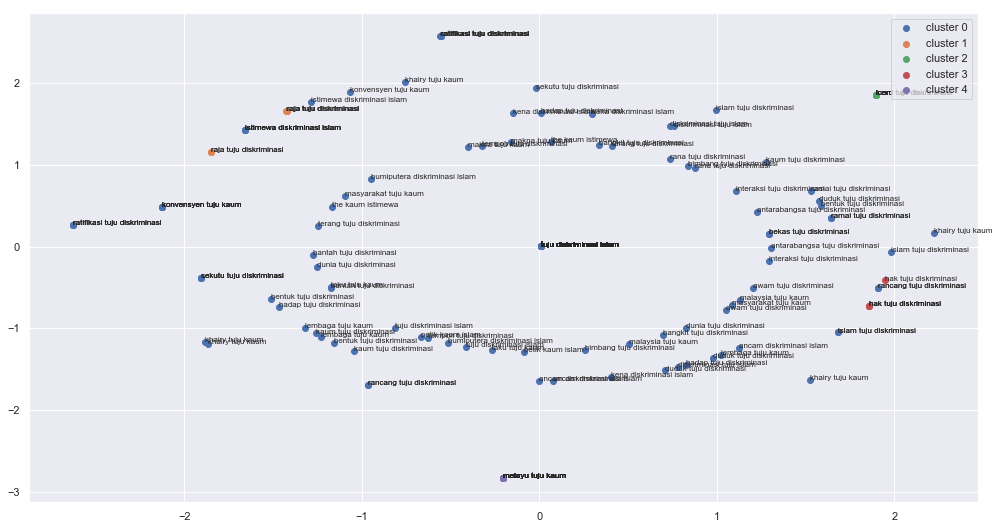

In [134]:
%matplotlib inline

import pandas as pd
result_scatter = malaya.cluster.cluster_scatter(corpus,vectorizer='tfidf')

**Dendogram**

Something is Definitely not right here

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'sekurang', 'setidak', 'tama', 'tidaknya', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Public\Anaconda3\lib\site-

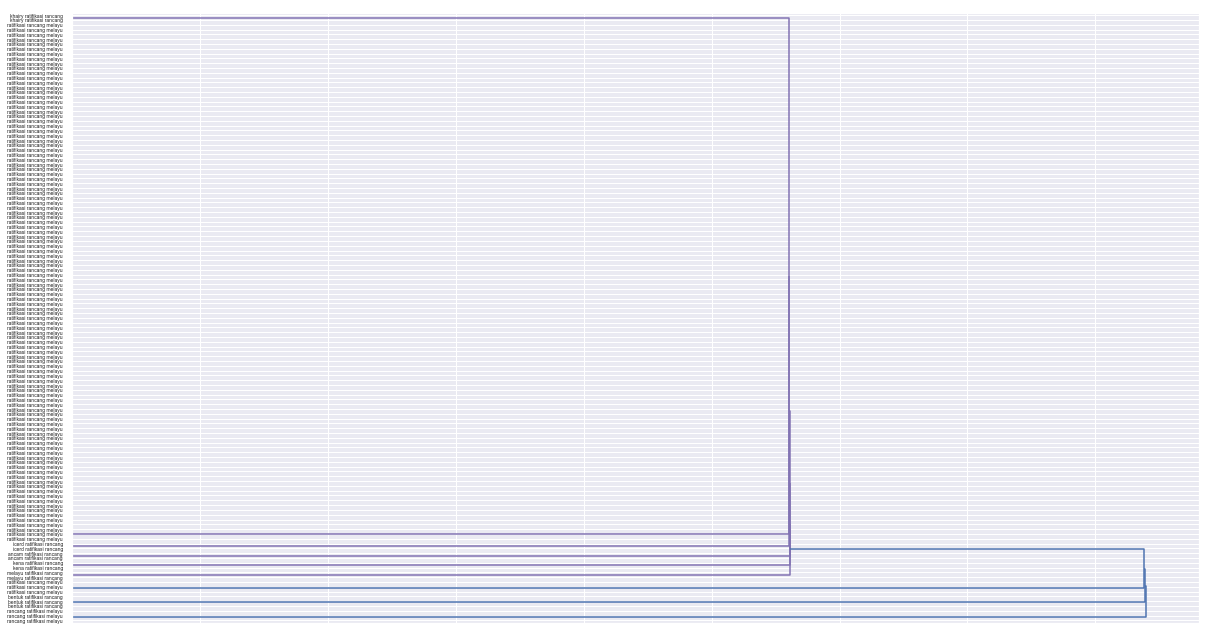

In [137]:
result_scatter = malaya.cluster.cluster_dendogram(corpus,vectorizer='tfidf')

**Entity Linking Plot**

Can't even plot (Can't find out why, have been trying for ages)
Says index out of range

In [130]:
entity_model = malaya.entity.deep_model('luong')
topic_model = malaya.topic_model.lda
result_linking = malaya.cluster.cluster_entity_linking(corpus,
                                                       entity_model,
                                                       topic_model,
                                                       vectorizer='tfidf')

C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'sekurang', 'setidak', 'tama', 'tidaknya', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


IndexError: list index out of range

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'sekurang', 'setidak', 'tama', 'tidaknya', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Public\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


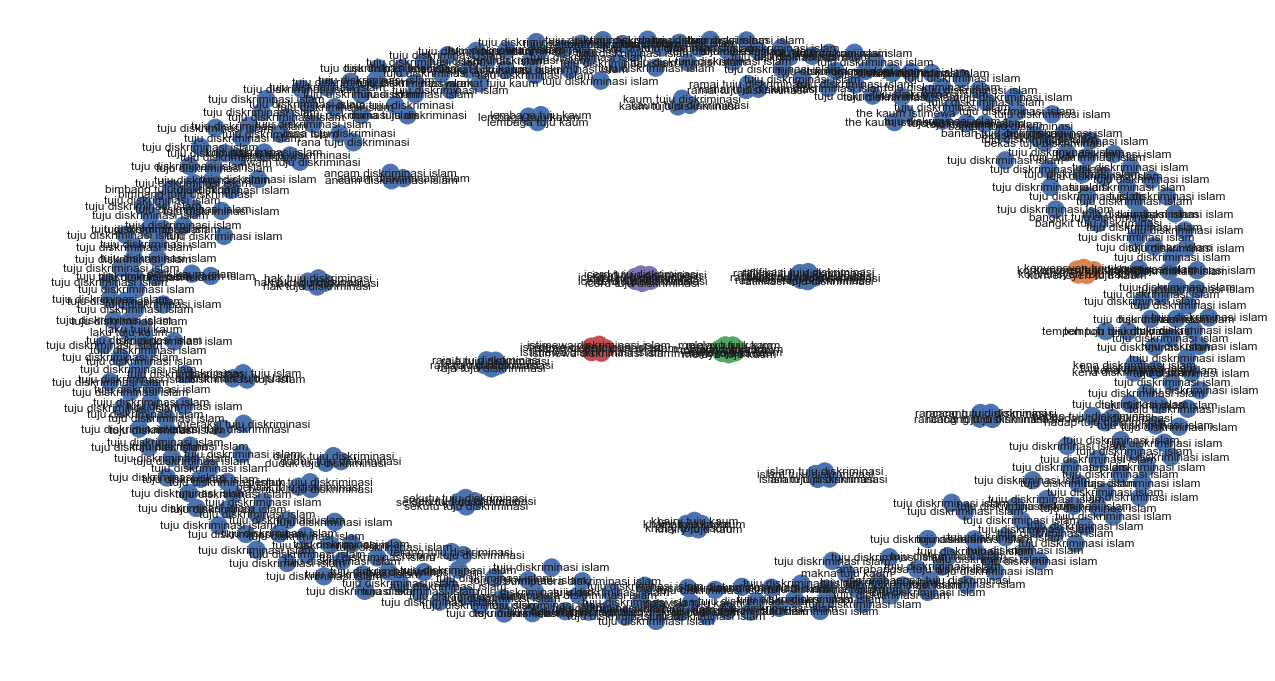

In [52]:
result_scatter = malaya.cluster.cluster_graph(corpus,vectorizer='tfidf')

**END**

Below is some stuff I followed from the tutorial such as generating and clustering ngrams, and cluster by pos

In [53]:
bahdanau_entities = malaya.entity.deep_model('bahdanau')
bahdanau_pos = malaya.pos.deep_model('bahdanau')

C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [63]:
result_entities = bahdanau_entities.predict(combined_text)
result_pos = bahdanau_pos.predict(combined_text)

In [64]:
generated_grams = malaya.generator.pos_entities_ngram(
    result_pos,
    result_entities,
    ngram = (1,3),
    accept_pos = ['NOUN','PROPN','VERB'],
    accept_entities = ['law', 'location', 'organization', 'person','time']
)


['ramai dilakukan',
 'membangkitkan soal',
 'sebarang',
 'Artikel 2',
 'berkenaan penamatan',
 'diterima orang',
 'engagement orang ramai',
 '15',
 'dipetik sisipan akhbar',
 'percaya kerajaan meneruskan',
 'kata Khairy Jamaluddin',
 'penerangan berterusan syndication',
 'sesuatu diterima',
 'Lumpur menyertai',
 'himpunan mulanya',
 'mulanya membantah',
 'ketua pemuda Umno',
 'dianggap sensitif',
 'berkata mengancam',
 'masyarakat',
 'menyebabkan menyekat',
 'peribadi merasakan',
 'konvensyen ada',
 'perbincangan interaksi engagement',
 'Muslim dunia meratifikasi',
 'Pihak',
 'himpunan',
 'Konvensyen Antarabangsa Penghapusan',
 'meratifikasi Icerd',
 'menjadi acara kesyukuran',
 'menyekat',
 'menyatakan',
 'mengancam kedudukan',
 'penerangan Icerd dilihat',
 'perbahasan Parlimen 15',
 'berkata mengancam kedudukan',
 'kompleks ada',
 'selari',
 'berterusan syndication',
 'Icerd perbahasan Parlimen',
 'penamatan bentuk diskriminasi',
 'sebarang bentuk diskriminasi',
 'Bumiputera Adakah s

In [138]:
clustered_grams =  malaya.cluster.cluster_words(generated_grams)

In [139]:
clustered_pos = malaya.cluster.cluster_pos(result_pos)

In [135]:
clustered_entities = malaya.cluster.cluster_entities(result_entities)